# Quickstart

In [1]:
%load_ext autoreload
%autoreload 2

import pens

## Load data from a `pandas.DataFrame`

In [2]:
# create test data in the form of a pandas.DataFrame
import pandas as pd
import numpy as np

df = pd.DataFrame()
df['Year'] = np.arange(1601, 1605)
df['ens.0'] = np.random.rand(len(df['Year']))
df['ens.1'] = np.random.rand(len(df['Year']))
df['ens.2'] = np.random.rand(len(df['Year']))
df

,Year,ens.0,ens.1,ens.2
0,1601,0.301043,0.714205,0.263454
1,1602,0.541269,0.327326,0.566437
2,1603,0.337212,0.805669,0.808061
3,1604,0.872904,0.436270,0.697700


In [3]:
# create an EnsembleTS from a pandas.DataFrame
ens_full = pens.EnsembleTS().from_df(df, time_column='Year')

# convert back to a pandas.DataFrame
df_out_full = ens_full.to_df(time_column='Year')
df_out_full

,Year,ens.0,ens.1,ens.2
0,1601,0.714205,0.301043,0.263454
1,1602,0.327326,0.541269,0.566437
2,1603,0.805669,0.337212,0.808061
3,1604,0.436270,0.872904,0.697700


In [4]:
# create an EnsembleTS from a pandas.DataFrame with value columns specified
ens_sub = pens.EnsembleTS().from_df(df, time_column='Year', value_columns=['ens.1', 'ens.2'])

# convert back to a pandas.DataFrame
df_out_sub = ens_sub.to_df(time_column='Year')
df_out_sub

,Year,ens.0,ens.1
0,1601,0.714205,0.263454
1,1602,0.327326,0.566437
2,1603,0.805669,0.808061
3,1604,0.436270,0.697700


## Load data from a .nc file

In [16]:
# the data can be downloaded from:
# https://atmos.washington.edu/%7Ehakim/lmr/LMRv2/gmt_MCruns_ensemble_full_LMRv2.1.nc
path = '../data/gmt_MCruns_ensemble_full_LMRv2.1.nc'
ens_LMR = pens.EnsembleTS().load_nc(path, var='gmt')

In [6]:
print(ens_LMR.value.shape)
print(ens_LMR.nt)
print(ens_LMR.nEns)

(2001, 2000)
2001
2000


## Plot the quantiles of the ensembles

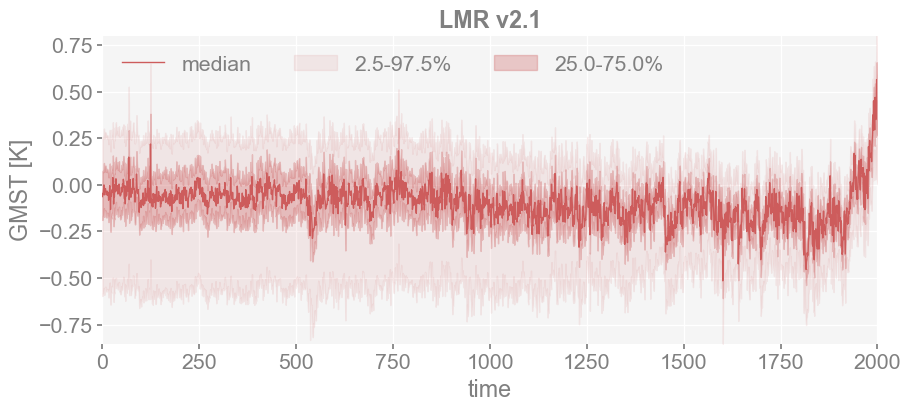

In [7]:
fig, ax = ens_LMR.plot_qs(ylabel='GMST [K]', title='LMR v2.1')

## Plot the ensembles in the form of timeseries 2d histogram

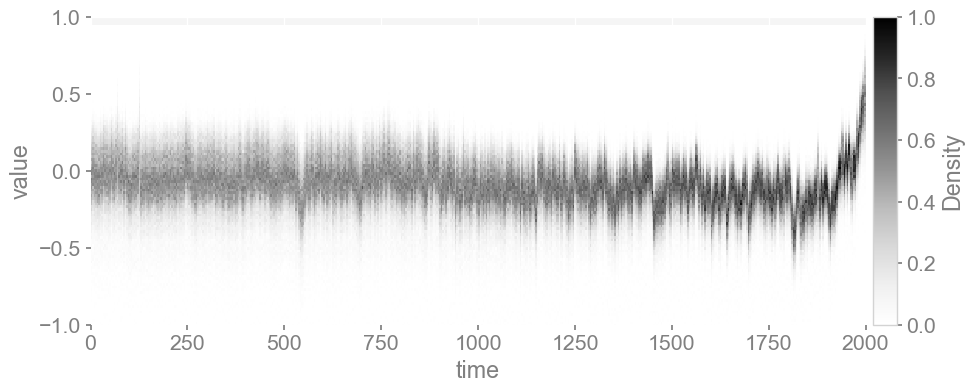

In [8]:
fig, ax = ens_LMR.line_density(ylim=(-1, 1))

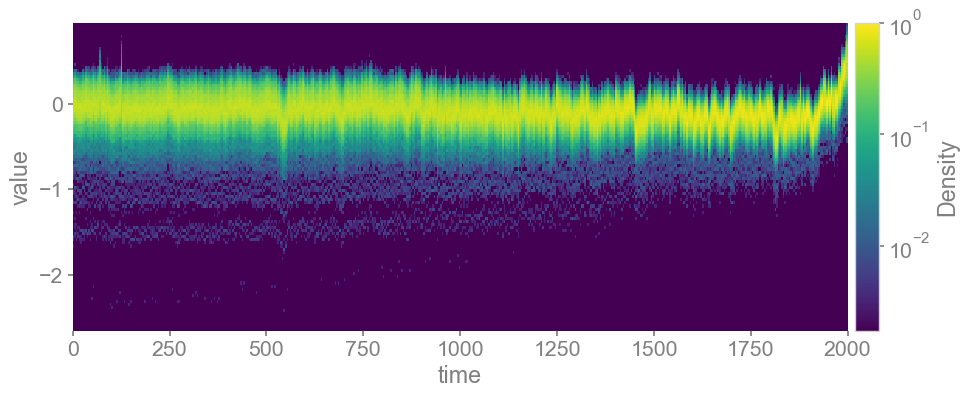

In [10]:
fig, ax = ens_LMR.line_density(color_scale='log', cmap='viridis', bins=[500, 100])


## Get and plot random sample paths from the ensembles

(2001, 3)


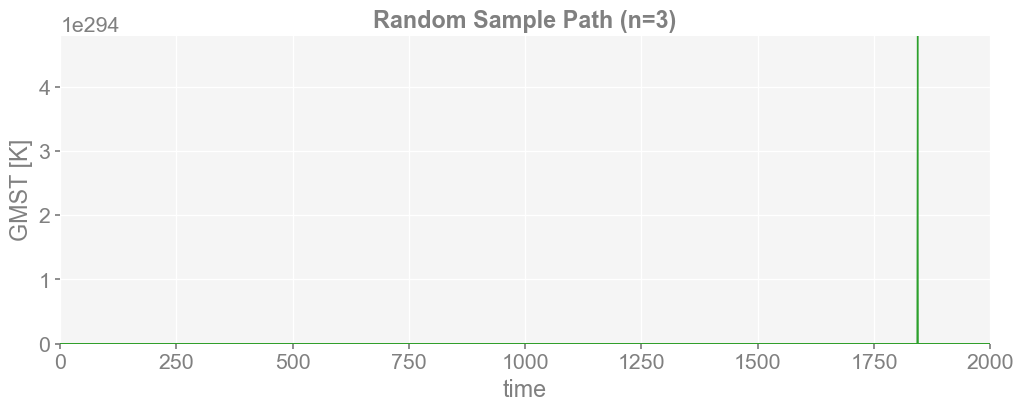

In [19]:
for n in [3]:
    ps = ens_LMR.random_paths(model='uniform', p=n, seed=2333)
    fig, ax = ps.plot(ylabel='GMST [K]', title=f'Random Sample Path (n={n})')
    print(ps.value.shape)